In [616]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats 
from itertools import combinations

In [617]:
pd.set_option('display.max_columns', 50)
pupils = pd.read_csv('stud_math.csv')

In [618]:
pupils.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
268,GP,M,18,U,NaN,NaN,4.0,2.0,NaN,other,reputation,father,NaN,2.0,0.0,no,NaN,yes,yes,yes,-6.0,yes,yes,yes,5.0,4.0,5.0,5.0,10.0,50.0
154,GP,F,17,U,GT3,T,4.0,4.0,other,teacher,course,mother,1.0,1.0,0.0,yes,yes,no,no,yes,-3.0,yes,no,yes,4.0,2.0,1.0,4.0,0.0,60.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
303,GP,F,17,U,GT3,T,3.0,2.0,health,NaN,reputation,father,1.0,4.0,0.0,no,yes,yes,yes,no,-12.0,yes,yes,no,5.0,2.0,2.0,5.0,0.0,90.0
353,MS,M,19,R,GT3,T,1.0,1.0,other,other,home,other,3.0,1.0,1.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,5.0,4.0,40.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


In [619]:
pupils.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

'Пропушенных значений в столбце score: 6'

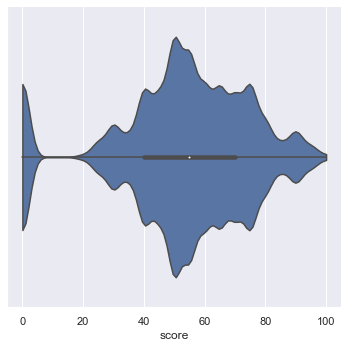

In [620]:
sns.catplot(x='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)
display('Пропушенных значений в столбце score: {}'.format(
    pupils.school.count()-pupils.score.count()))

# Первичная информация о DataSet
Данные насчитывают 395 строк. За исключением первых трех столбцов, имеются пропуски.

Из 30 столбцов, 13 содержат числовые данные. Соответственно, 17 содержат данные категории object.
Имееются строки в которых отсутствует предсказыемая переменая. Данные строки не имеют ценности и будут отсечены.

In [621]:
pupils=pupils[(pupils.score >=0)&(pupils.score <= 100)]

# Столбец School

,school
GP,344
MS,45


,school
count,389
unique,2
top,GP
freq,344


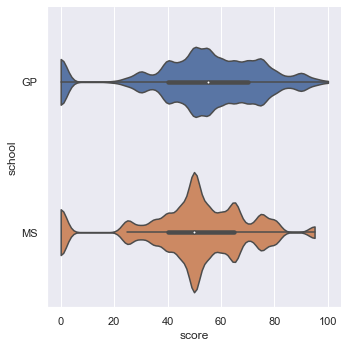

In [622]:
display(pd.DataFrame(pupils.school.value_counts()))
display(pd.DataFrame(pupils.school.describe()))
sns.catplot(x='score', y='school',
            kind="violin", bw=.1, cut=0,
            data=pupils)

Ниже функция, проверяющая наличае статистически значимых различий между вариациями признака.

Н0 = Распределение баллов теста по параметрам неразличимы.
Н1 = Распределение баллов теста по параметрам имеет статистически значимые различия.
Уровень значимости - 5%

In [623]:
def signific(column):
    H0 = True
    variations=len(column.value_counts().index)
    indexes=[i for i in range (0,variations)]
    comb=list(combinations(indexes, 2))
    for c in comb:
        x = pupils[column == column.value_counts().index[c[0]]].score
        y = pupils[column == column.value_counts().index[c[1]]].score
        t_test = weightstats.ttest_ind(x, y, usevar='unequal')
        if t_test[1] <= 0.05/len(comb):
            H0 = False
    if H0 == True:
        answer = 'Статистически значимые различия не найдены. Данные не несут ценности.'
    else:
        answer = 'Найдены статистически значимые различия'
    return answer

In [624]:
signific(pupils.school)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Столбец school содержит два уникальных значения. Пропусков не имеется. Статистически значимые различия не найдены. Данные подлежат удалению.

In [625]:
del pupils['school']

# Столбец Sex

,sex
F,204
M,185


,sex
count,389
unique,2
top,F
freq,204


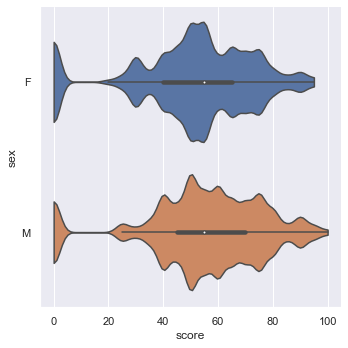

In [626]:
display(pd.DataFrame(pupils.sex.value_counts()))
display(pd.DataFrame(pupils.sex.describe()))
sns.catplot(x='score', y='sex',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [627]:
signific(pupils.sex)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Столбец пола ученика ожидаемо содержит два уникальных значения.
Имеется небольшое преобладание девочек, пропусков данных нет. Статистически значимые различия не найдены. Данные подлежат удалению.

In [628]:
del pupils['sex']

# Столбец Age

,age
16,103
17,98
15,82
18,80
19,21
20,3
21,1
22,1


,age
count,389.000000
mean,16.673522
std,1.265662
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


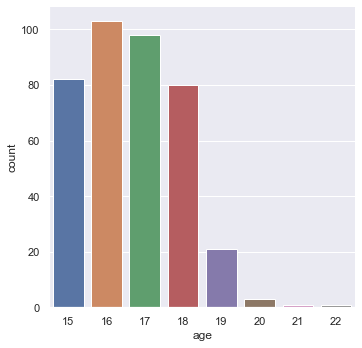

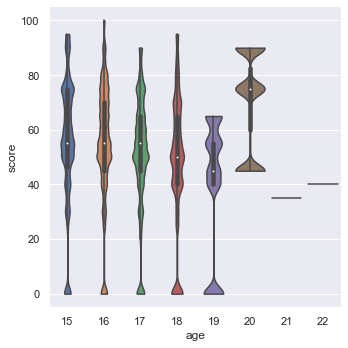

In [629]:
display(pd.DataFrame(pupils.age.value_counts().sort_values(ascending=False)))
display(pd.DataFrame(pupils.age.describe()))
sns.catplot(x='age', kind='count', data=pupils)
sns.catplot(x='age', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

Ниже функция, расчитывающая границы выбросов как: медиана +/- 1.5*IQR.

In [630]:
def box_info(column):
    median = column.median()
    Q_25 = column.quantile(0.25)
    Q_75 = column.quantile(0.75)
    IQR = column.quantile(0.75)-column.quantile(0.25)
    result = 'Медиана:{}; 25%:{}; 75%:{}; IQR:{}; Границы выбросов:{},{}'.format(
        median, Q_25, Q_75, IQR, Q_25-1.5*IQR, Q_75+1.5*IQR)
    
    return result

'Медиана:17.0; 25%:16.0; 75%:18.0; IQR:2.0; Границы выбросов:13.0,21.0'

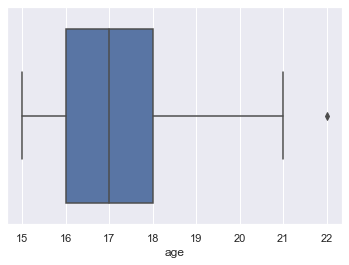

In [632]:
display(box_info(pupils.age))
sns.boxplot(x='age',  data=pupils, whis=1.5)

Данные предоставлены по ученикам, чей возраст превышает 15 лет. Средний возраст ученика, сдававшего экзамен около 17ти лет. Данные смещены в большу сторону, имеются выбросы.

Распределение результата экзамена среди старших возрастов отличается от общего распределения в DataSet (в частности, выше процент проваливших экзамен среди 19тилетних). Из расчета медиана + 1.5 IQR, верхняя граница выбросов равна 21. Тем не менее, по возрастам 20, 21, 22 выборка слишком мала (n*'p<5). В связи с этим, решено принять за верхний возраст отсечения 19 лет.

In [633]:
pupils = pupils[pupils.age <= 19]

# Столбец Address

,address
U,288
R,82


,address
count,370
unique,2
top,U
freq,288


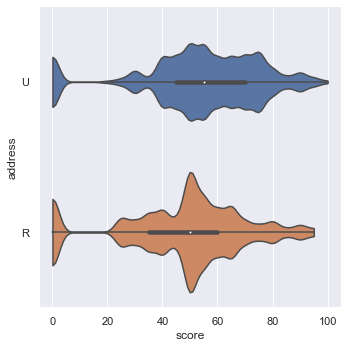

In [634]:
display(pd.DataFrame(pupils.address.value_counts()))
display(pd.DataFrame(pupils.address.describe()))
sns.catplot(x='score', y='address',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [635]:
signific(pupils.address)

'Найдены статистически значимые различия'

In [636]:
address_missed = pupils[(pupils.address != 'U') & (
    pupils.address != 'R')].score.count()
print('Пропушенных значений в столбце: {}'.format(address_missed))

Пропушенных значений в столбце: 14


Тип адреса учеников имеет два уникальных значения. Заметно значительное преобладание учеников, проживающих в городе. Данные по части учащихся отсутствуют. Статистически значимые различия найдены. Данные предоставляют ценность.

# Столбец Famsize

,famsize
GT3,251
LE3,106


,famsize
count,357
unique,2
top,GT3
freq,251


'Пропушенных значений в столбце: 27'

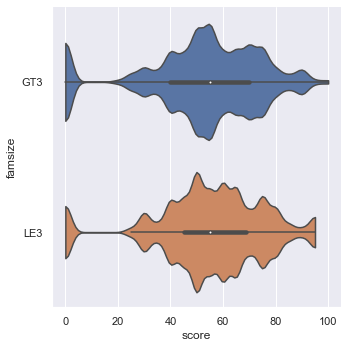

In [637]:
display(pd.DataFrame(pupils.famsize.value_counts()))
display(pd.DataFrame(pupils.famsize.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.famsize.count()))
sns.catplot(x='score', y='famsize',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [638]:
signific(pupils.famsize)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Размер семьи учеников имеет два уникальных значения. Преобладают семьи, в которых белее 3ех членов. Данные по части учащихся отсутствуют. Статистически значимые различия не найдены. Данные подлежат удалению.

In [639]:
del pupils['famsize']

# Столбец Famsize

,Pstatus
T,305
A,34


,Pstatus
count,339
unique,2
top,T
freq,305


'Пропушенных значений в столбце: 45'

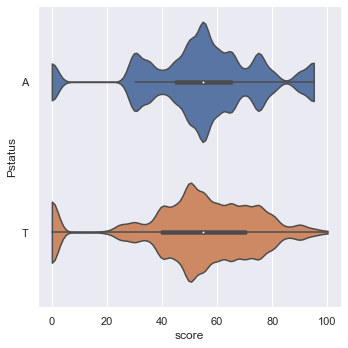

In [640]:
display(pd.DataFrame(pupils.Pstatus.value_counts()))
display(pd.DataFrame(pupils.Pstatus.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.Pstatus.count()))
sns.catplot(x='score', y='Pstatus',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [641]:
signific(pupils.Pstatus)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Статус отнашений в семьях учеников имеет два уникальных значения. Преобладают семьи, в которых родители вместе. Данные по части учащихся отсутствуют. Статистически значимые различия не найдены. Данные подлежат удалению.

In [642]:
del pupils['Pstatus']

# Столбец Medu

,Medu
4.0,130
2.0,99
3.0,94
1.0,55
0.0,3


,Medu
count,381.000000
mean,2.769029
std,1.095054
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


'Пропушенных значений в столбце: 3'

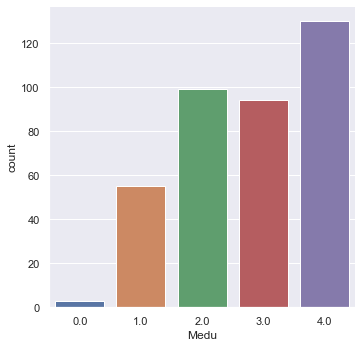

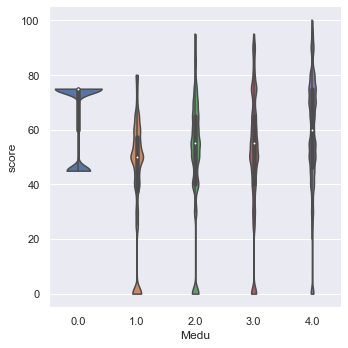

In [643]:
display(pd.DataFrame(pupils.Medu.value_counts()))
display(pd.DataFrame(pupils.Medu.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.Medu.count()))
sns.catplot(x='Medu', kind='count', data=pupils)
sns.catplot(x='Medu', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

'Медиана:3.0; 25%:2.0; 75%:4.0; IQR:2.0; Границы выбросов:-1.0,7.0'

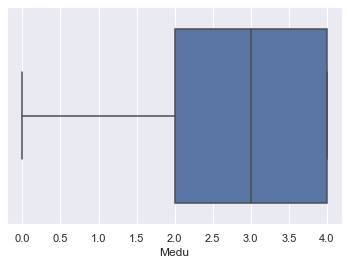

In [644]:
display(box_info(pupils.Medu))
sns.boxplot(x='Medu',  data=pupils, whis=1.5)

Данные в столбце говорят об уровне образования матери ученика. Данные по части учащихся отсутствуют.

Не смотря на то, что данные не выходят за границы выбросов, выборка матерей без образования (Medu=0) слишком мала (n*'p<5). В связи с этим, решено принять уровень 1 - 4 класса (Medu=1) как нижнюю границу отсечения.

In [645]:
pupils = pupils[pupils.Medu >= 1]

# Столбец Fedu

,Fedu
2.0,99
3.0,93
4.0,88
1.0,71
0.0,2
40.0,1


,Fedu
count,354.000000
mean,2.655367
std,2.268115
min,0.000000
25%,2.000000
50%,3.000000
75%,3.750000
max,40.000000


'Пропушенных значений в столбце: 24'

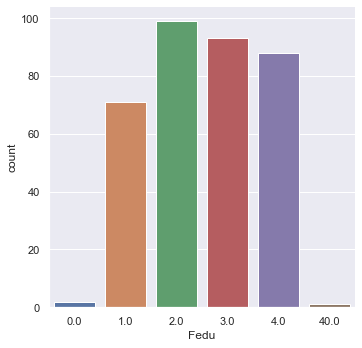

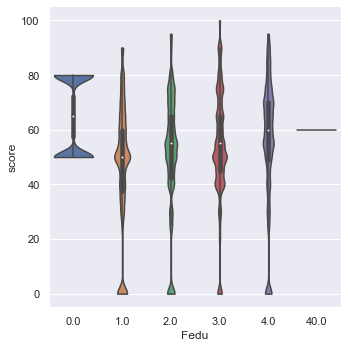

In [646]:
display(pd.DataFrame(pupils.Fedu.value_counts()))
display(pd.DataFrame(pupils.Fedu.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.Fedu.count()))
sns.catplot(x='Fedu', kind='count', data=pupils)
sns.catplot(x='Fedu', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

'Медиана:3.0; 25%:2.0; 75%:3.75; IQR:1.75; Границы выбросов:-0.625,6.375'

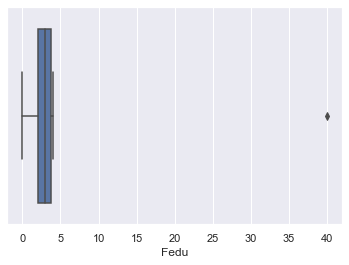

In [647]:
display(box_info(pupils.Fedu))
sns.boxplot(x='Fedu', data=pupils, whis=1.5)

Данные в столбце говорят об уровне образования отца ученика. Данные по части учащихся отсутствуют.

Имеются явный выброс данных в большую сторону. Также, выборка матерей без образования (Fedu=0) слишком мала (n*'p<5).

In [648]:
pupils = pupils[(pupils.Fedu > 0)&(pupils.Fedu <= 5.625)]

# Столбец Mjob

,Mjob
other,114
services,86
at_home,55
teacher,47
health,30


,Mjob
count,332
unique,5
top,other
freq,114


'Пропушенных значений в столбце: 19'

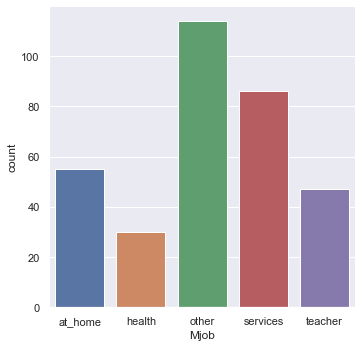

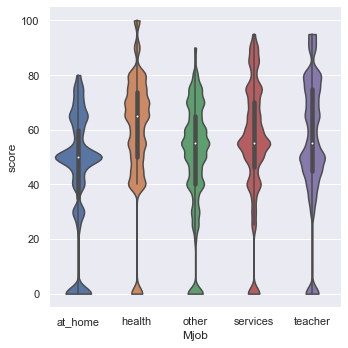

In [649]:
display(pd.DataFrame(pupils.Mjob.value_counts()))
display(pd.DataFrame(pupils.Mjob.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.Mjob.count()))
sns.catplot(x='Mjob', kind='count', data=pupils)
sns.catplot(x='Mjob', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [650]:
signific(pupils.schoolsup)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Данные содержат информацию о тудоустройстве матерей учеников. Данные по части учащихся отсутствуют. Статистически значимые различия не найдены. Данные подлежат удалению.

In [651]:
del pupils['Mjob']

# Столбец Fjob

,Fjob
other,178
services,87
teacher,26
at_home,13
health,13


,Fjob
count,317
unique,5
top,other
freq,178


'Пропушенных значений в столбце: 34'

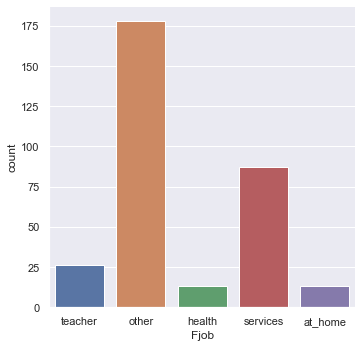

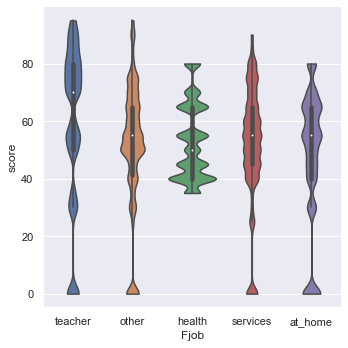

In [652]:
display(pd.DataFrame(pupils.Fjob.value_counts()))
display(pd.DataFrame(pupils.Fjob.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.Fjob.count()))
sns.catplot(x='Fjob', kind='count', data=pupils)
sns.catplot(x='Fjob', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [653]:
signific(pupils.Fjob)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Данные содержат информацию о тудоустройстве отцов учеников. Данные по части учащихся отсутствуют. Статистически значимые различия не найдены. Данные подлежат удалению.

In [654]:
del pupils['Fjob']

# Столбец reason

,reason
course,120
reputation,94
home,91
other,30


,reason
count,335
unique,4
top,course
freq,120


'Пропушенных значений в столбце: 16'

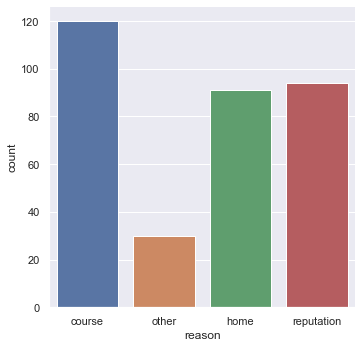

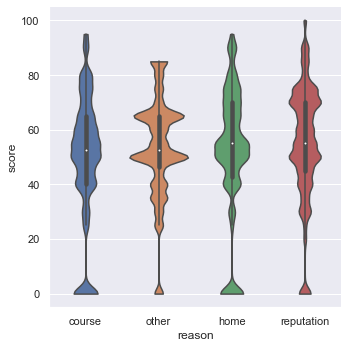

In [655]:
display(pd.DataFrame(pupils.reason.value_counts()))
display(pd.DataFrame(pupils.reason.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.reason.count()))
sns.catplot(x='reason', kind='count', data=pupils)
sns.catplot(x='reason', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [656]:
signific(pupils.reason)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Данные содержат информацию о причинах выбора школы. Данные по части учащихся отсутствуют. Статистически значимые различия не найдены. Данные подлежат удалению.

In [657]:
del pupils['reason']

# Столбец guardian

,guardian
mother,229
father,75
other,20


,guardian
count,324
unique,3
top,mother
freq,229


'Пропушенных значений в столбце: 27'

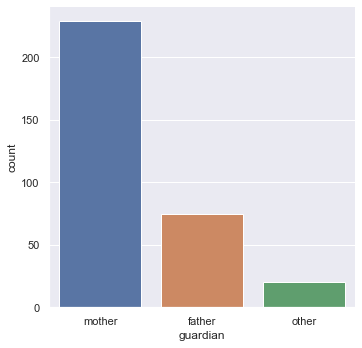

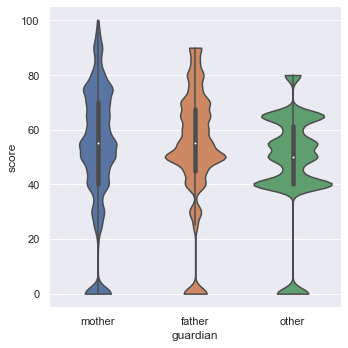

In [658]:
display(pd.DataFrame(pupils.guardian.value_counts()))
display(pd.DataFrame(pupils.guardian.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.guardian.count()))
sns.catplot(x='guardian', kind='count', data=pupils)
sns.catplot(x='guardian', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [659]:
signific(pupils.guardian)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Данные содержат информацию о опекуне ученика. Данные по части учащихся отсутствуют. Статистически значимые различия не найдены. Данные подлежат удалению.

In [660]:
del pupils['guardian']

# Столбец traveltime

,traveltime
1.0,213
2.0,86
3.0,20
4.0,7


,traveltime
count,326.000000
mean,1.450920
std,0.707574
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


'Пропушенных значений в столбце: 25'

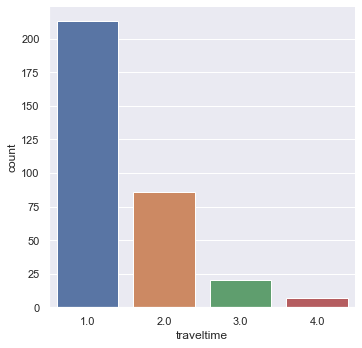

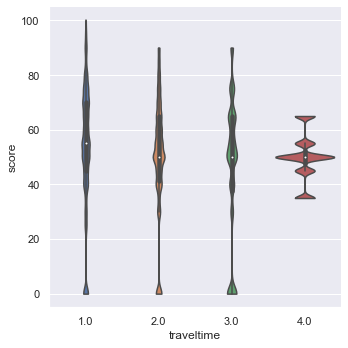

In [661]:
display(pd.DataFrame(pupils.traveltime.value_counts()))
display(pd.DataFrame(pupils.traveltime.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.traveltime.count()))
sns.catplot(x='traveltime', kind='count', data=pupils)
sns.catplot(x='traveltime', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

'Медиана:1.0; 25%:1.0; 75%:2.0; IQR:1.0; Границы выбросов:-0.5,3.5'

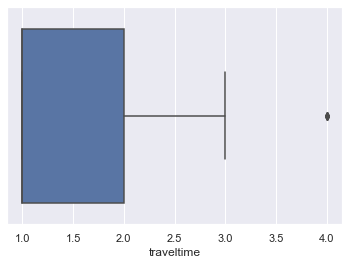

In [665]:
display(box_info(pupils.traveltime))
sns.boxplot(x='traveltime', data=pupils, whis=1.5)

Данные содержат информацию о времени, уходящем на дорогу до школы среди учеников. Данные по части учащихся отсутствуют. Крайне мало учеников тратят на дорогу более 60 мин (traveltime=4). Тем не менее пропорция таких учеников достаточная (n*'p>5).

# Столбец studytime

,studytime
2.0,172
1.0,93
3.0,55
4.0,24


,studytime
count,344.000000
mean,2.029070
std,0.842925
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


'Пропушенных значений в столбце: 7'

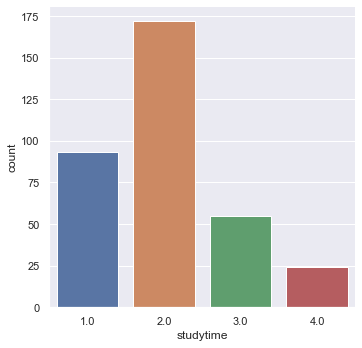

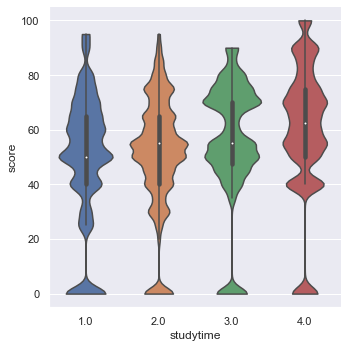

In [667]:
display(pd.DataFrame(pupils.studytime.value_counts()))
display(pd.DataFrame(pupils.studytime.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.studytime.count()))
sns.catplot(x='studytime', kind='count', data=pupils)
sns.catplot(x='studytime', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

'Медиана:2.0; 25%:1.0; 75%:2.0; IQR:1.0; Границы выбросов:-0.5,3.5'

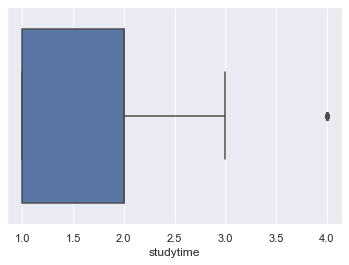

In [668]:
display(box_info(pupils.studytime))
sns.boxplot(x='studytime', data=pupils, whis=1.5)

Данные содержат информацию о времени, потраченном на учебу среди учеников. Данные по части учащихся отсутствуют. Наименьшее количество учеников тратят на учебу более 10 часов в неделю (studytime=4). Тем не менее пропорция таких учеников достаточная (n*'p>5).

# Столбец failures

,failures
0.0,268
1.0,43
2.0,11
3.0,11


,failures
count,333.000000
mean,0.294294
std,0.688020
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


'Пропушенных значений в столбце: 18'

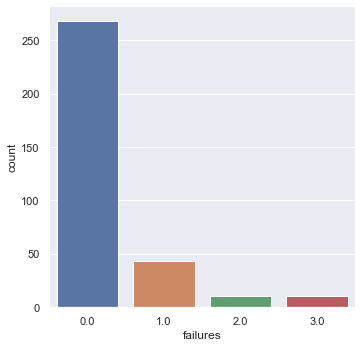

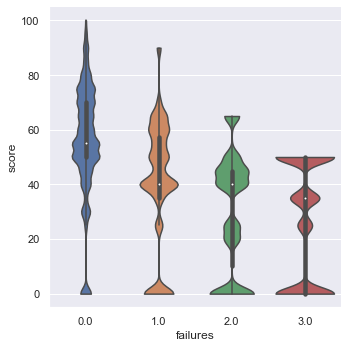

In [670]:
display(pd.DataFrame(pupils.failures.value_counts()))
display(pd.DataFrame(pupils.failures.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.failures.count()))
sns.catplot(x='failures', kind='count', data=pupils)
sns.catplot(x='failures', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

'Медиана:0.0; 25%:0.0; 75%:0.0; IQR:0.0; Границы выбросов:0.0,0.0'

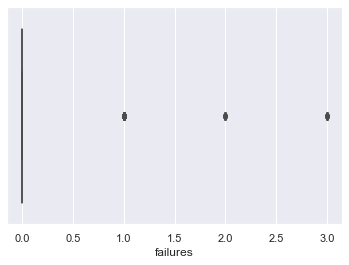

In [671]:
display(box_info(pupils.failures))
sns.boxplot(x='failures', data=pupils, whis=1.5)

Данные содержат информацию о количестве внеучебных неудач учеников. Данные по части учащихся отсутствуют. Большинство учеников не имеют внеучебных неудач (failures=0). Тем не менее пропорции оснальных учеников достаточные (n*'p>5).

# Столбец schoolsup

,schoolsup
no,299
yes,44


,schoolsup
count,343
unique,2
top,no
freq,299


'Пропушенных значений в столбце: 8'

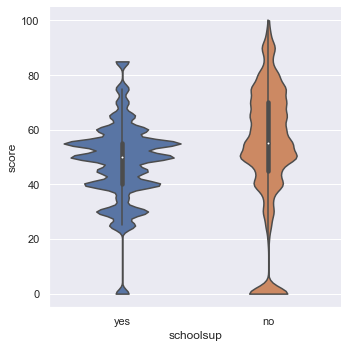

In [672]:
display(pd.DataFrame(pupils.schoolsup.value_counts()))
display(pd.DataFrame(pupils.schoolsup.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.schoolsup.count()))
sns.catplot(x='schoolsup', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [673]:
signific(pupils.schoolsup)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Дополнительная образовательная поддержка имеет два уникальных значения. Преобладают ученики, не получавшие поддержки. Данные по части учащихся отсутствуют. Статистически значимые различия не найдены. Данные подлежат удалению.

In [674]:
del pupils['schoolsup']

# Столбец famsup

,famsup
yes,196
no,122


,famsup
count,318
unique,2
top,yes
freq,196


'Пропушенных значений в столбце: 33'

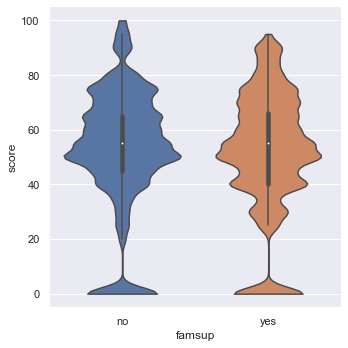

In [676]:
display(pd.DataFrame(pupils.famsup.value_counts()))
display(pd.DataFrame(pupils.famsup.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.famsup.count()))
sns.catplot(x='famsup', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [512]:
signific(pupils.famsup)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Семейная образовательная поддержка имеет два уникальных значения. Имеется преобладание учеников, не получавших поддержки. Данные по части учащихся отсутствуют. Статистически значимые различия не найдены. Данные подлежат удалению.

In [677]:
del pupils['famsup']

# Столбец paid

,paid
no,176
yes,139


,paid
count,315
unique,2
top,no
freq,176


'Пропушенных значений в столбце: 36'

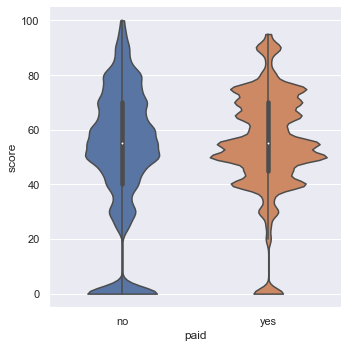

In [678]:
display(pd.DataFrame(pupils.paid.value_counts()))
display(pd.DataFrame(pupils.paid.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.paid.count()))
sns.catplot(x='paid', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [679]:
signific(pupils.paid)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Дополнительный платные занятия по матике имеют два уникальных значения. Имеется преобладание учеников, без платных занятий. Данные по части учащихся отсутствуют. Статистически значимые различия не найдены. Данные подлежат удалению.

In [680]:
del pupils['paid']

# Столбец activities

,activities
yes,173
no,164


,activities
count,337
unique,2
top,yes
freq,173


'Пропушенных значений в столбце: 14'

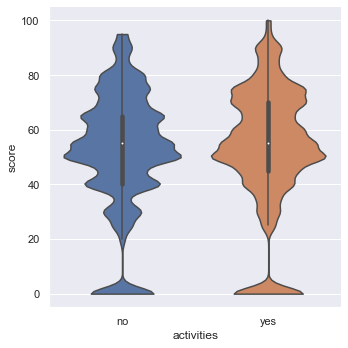

In [681]:
display(pd.DataFrame(pupils.activities.value_counts()))
display(pd.DataFrame(pupils.activities.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.activities.count()))
sns.catplot(x='activities', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [514]:
signific(pupils.activities)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Дополнительный внеучебные занятия имеют два уникальных значения. Данные распределены примерно равномерно. Данные по части учащихся отсутствуют. Статистически значимые различия не найдены. Данные подлежат удалению.

In [682]:
del pupils['activities']

# Столбец nursery

,nursery
yes,268
no,69


,nursery
count,337
unique,2
top,yes
freq,268


'Пропушенных значений в столбце: 14'

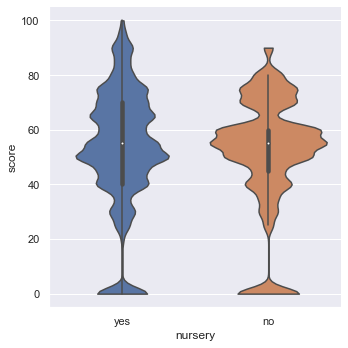

In [685]:
display(pd.DataFrame(pupils.nursery.value_counts()))
display(pd.DataFrame(pupils.nursery.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.nursery.count()))
sns.catplot(x='nursery', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [686]:
signific(pupils.nursery)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Посещение детского сада имеет два уникальных значения. Имеется преобладание учеников, посещавших детский сад. Данные по части учащихся отсутствуют. Статистически значимые различия не найдены. Данные подлежат удалению.

In [687]:
del pupils['nursery']

# Столбец higher

,higher
yes,320
no,16


,higher
count,336
unique,2
top,yes
freq,320


'Пропушенных значений в столбце: 15'

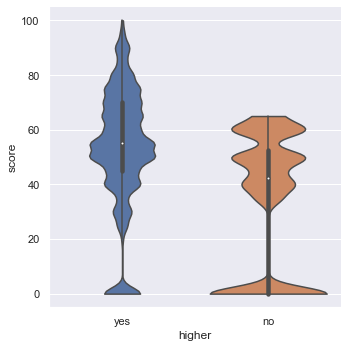

In [688]:
display(pd.DataFrame(pupils.higher.value_counts()))
display(pd.DataFrame(pupils.higher.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.higher.count()))
sns.catplot(x='higher', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [516]:
signific(pupils.higher)

'Найдены статистически значимые различия'

Желание учеников получить высшее образование имеет два уникальных значения. Имеется преобладание учеников, заявивших о желании получить высшее образование. Данные по части учащихся отсутствуют. Найдены статистически значимые различия. Данные имеют ценность.

# Столбец internet

,internet
yes,271
no,48


,internet
count,319
unique,2
top,yes
freq,271


'Пропушенных значений в столбце: 32'

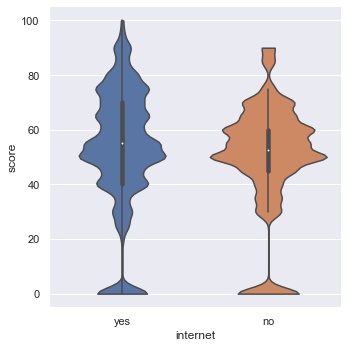

In [689]:
display(pd.DataFrame(pupils.internet.value_counts()))
display(pd.DataFrame(pupils.internet.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.internet.count()))
sns.catplot(x='internet', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [690]:
signific(pupils.internet)

'Статистически значимые различия не найдены. Данные не несут ценности.'

Наличае домашнего подключения к Internet имеет два уникальных значения. Преобладают ученики имеюющие подключение. Данные по части учащихся отсутствуют. Статистически значимые различия не найдены. Данные подлежат удалению.

In [691]:
del pupils['internet']

# Столбец romantic

,romantic
no,212
yes,112


,romantic
count,324
unique,2
top,no
freq,212


'Пропушенных значений в столбце: 27'

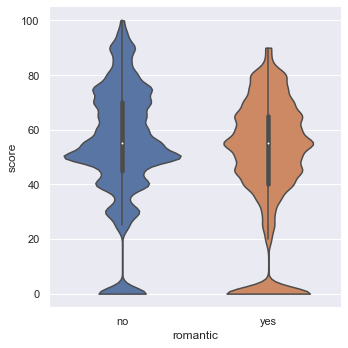

In [692]:
display(pd.DataFrame(pupils.romantic.value_counts()))
display(pd.DataFrame(pupils.romantic.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.romantic.count()))
sns.catplot(x='romantic', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

In [693]:
signific(pupils.romantic)

'Найдены статистически значимые различия'

Наличае у учеников романтических отнашений имеет два уникальных значения. Имеется преобладание учеников, не состоящих в отнашениях. Данные по части учащихся отсутствуют. Найдены статистически значимые различия. Данные имеют ценность.

# Столбец famrel

,famrel
4.0,161
5.0,87
3.0,55
2.0,16
1.0,7


,famrel
count,326.000000
mean,3.935583
std,0.907486
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


'Пропушенных значений в столбце: 0'

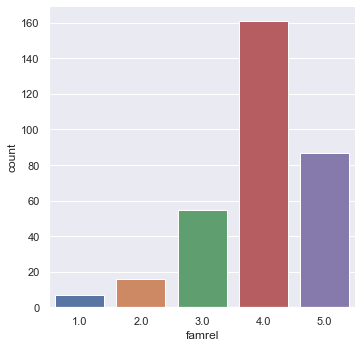

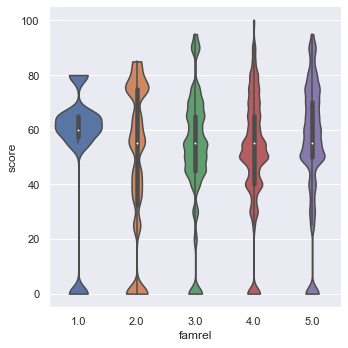

In [697]:
display(pd.DataFrame(pupils.famrel.value_counts()))
display(pd.DataFrame(pupils.famrel.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.famrel.count()))
sns.catplot(x='famrel', kind='count', data=pupils)
sns.catplot(x='famrel', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

'Медиана:4.0; 25%:4.0; 75%:5.0; IQR:1.0; Границы выбросов:2.5,6.5'

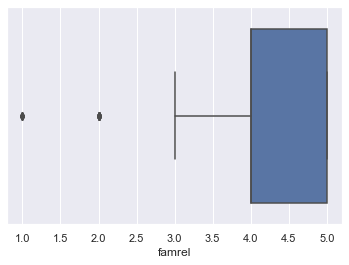

In [698]:
display(box_info(pupils.famrel))
sns.boxplot(x='famrel', data=pupils, whis=1.5)

Данные содержат информацию о семейных отнашениях учеников. Данные по части учащихся отсутствуют. Имеется явный выброс с отрицательным значением. Большинство учеников имеют хорошие семейные отношения (famrel=4). Не смотря на то, что полохие и очень плохие отношения (famrel=1|famrel=2) встречатся редко, пропорции данных учеников достаточные (n*'p>5).

In [699]:
pupils = pupils[pupils.famrel > 0]

# Столбец freetime

,freetime
3.0,128
4.0,91
2.0,54
5.0,29
1.0,17


,freetime
count,319.000000
mean,3.191223
std,0.998955
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


'Пропушенных значений в столбце: 7'

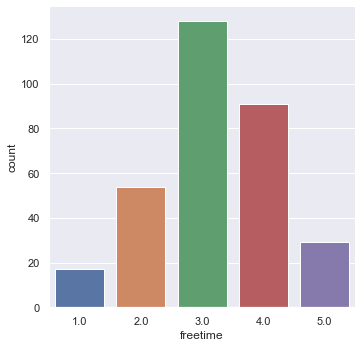

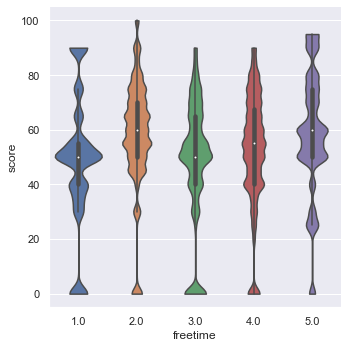

In [702]:
display(pd.DataFrame(pupils.freetime.value_counts()))
display(pd.DataFrame(pupils.freetime.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.freetime.count()))
sns.catplot(x='freetime', kind='count', data=pupils)
sns.catplot(x='freetime', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

'Медиана:3.0; 25%:3.0; 75%:4.0; IQR:1.0; Границы выбросов:1.5,5.5'

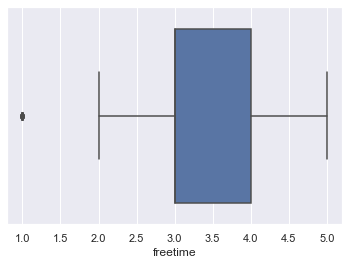

In [703]:
display(box_info(pupils.freetime))
sns.boxplot(x='freetime', data=pupils, whis=1.5)

Данные содержат информацию о свободном времени учеников. Данные по части учащихся отсутствуют. Большинство учеников имеет среднее количество свободного времени (freetime=3). Не смотря на то, малого количества свободного времени довольно редки (freetime=1), пропорция данных учеников достаточна (n*'p>5).

# Столбец goout

,goout
3.0,109
2.0,83
4.0,66
5.0,43
1.0,19


,goout
count,320.000000
mean,3.096875
std,1.111350
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


'Пропушенных значений в столбце: 6'

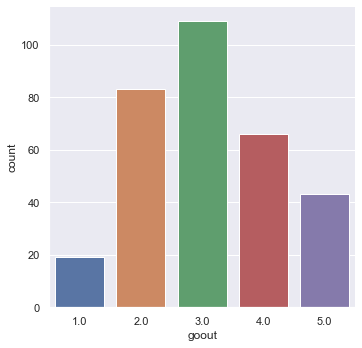

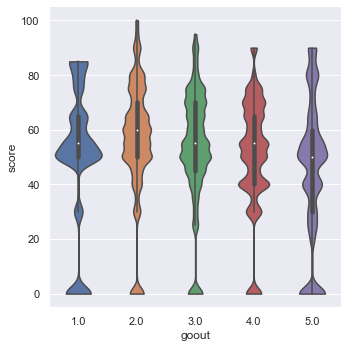

In [704]:
display(pd.DataFrame(pupils.goout.value_counts()))
display(pd.DataFrame(pupils.goout.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.goout.count()))
sns.catplot(x='goout', kind='count', data=pupils)
sns.catplot(x='goout', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

'Медиана:3.0; 25%:2.0; 75%:4.0; IQR:2.0; Границы выбросов:-1.0,7.0'

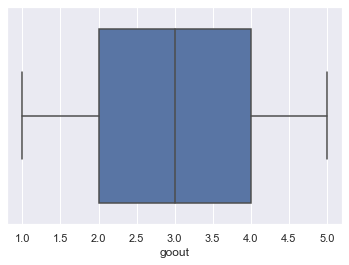

In [706]:
display(box_info(pupils.goout))
sns.boxplot(x='goout', data=pupils, whis=1.5)

Данные содержат информацию о проведенном с друзьями времени учеников. Данные по части учащихся отсутствуют. Распределиние данных примерно симетрично.

# Столбец health

,health
5.0,106
3.0,77
4.0,54
1.0,40
2.0,36


,health
count,313.000000
mean,3.479233
std,1.389193
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


'Пропушенных значений в столбце: 13'

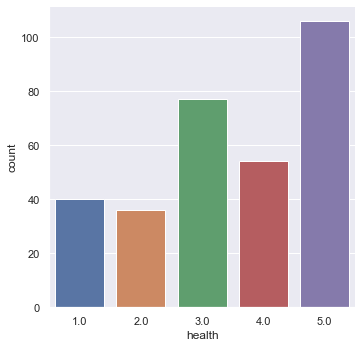

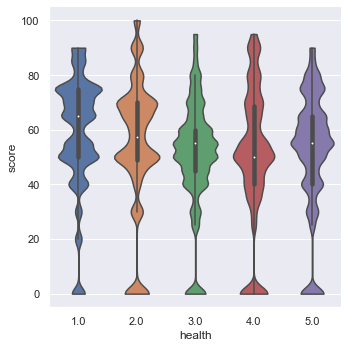

In [707]:
display(pd.DataFrame(pupils.health.value_counts()))
display(pd.DataFrame(pupils.health.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.health.count()))
sns.catplot(x='health', kind='count', data=pupils)
sns.catplot(x='health', y='score',
            kind="violin", bw=.1, cut=0,
            data=pupils)

'Медиана:4.0; 25%:3.0; 75%:5.0; IQR:2.0; Границы выбросов:0.0,8.0'

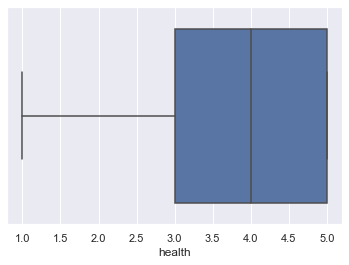

In [709]:
display(box_info(pupils.health))
sns.boxplot(x='health', data=pupils, whis=1.5)

Данные содержат информацию о сотоянии здоровья учеников. Большинство учиников имеет очень хорошее здоровье. Данные по части учащихся отсутствуют. Распределиние данных смещено влево.

# Столбец absences

,absences
count,315.000000
mean,6.844444
std,22.645100
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,385.000000


'Пропушенных значений в столбце: 11'

,absences
0.0,90
2.0,52
4.0,44
6.0,26
8.0,18
10.0,14
12.0,11
14.0,9
3.0,6
16.0,6


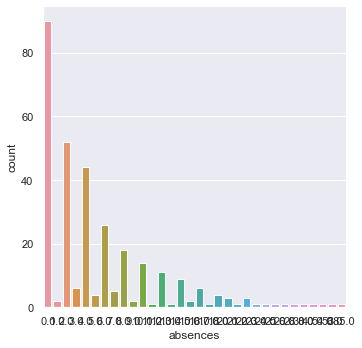

In [717]:
display(pd.DataFrame(pupils.absences.describe()))
display('Пропушенных значений в столбце: {}'.format(
    pupils.score.count()-pupils.absences.count()))
sns.catplot(x='absences', kind='count', data=pupils)
display(pd.DataFrame(pupils.absences.value_counts()))

'Медиана:4.0; 25%:0.0; 75%:8.0; IQR:8.0; Границы выбросов:-12.0,20.0'

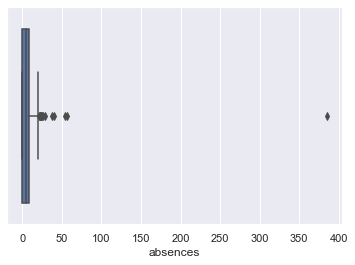

In [711]:
display(box_info(pupils.absences))
sns.boxplot(x='absences', data=pupils, whis=1.5)

Данные содержат информацию о количестве занятий пропущенных ученикоами. Большинство учиников пропускало не более 4ех занятий. Данные по части учащихся отсутствуют. Имеются выбросы в большую сторону. Нет оснований пологать, пропорция данных учеников в выбросах достаточна (n*'p<5).

In [721]:
pupils = pupils[pupils.absences < 20]

# Столбец score

,score
count,326.000000
mean,52.453988
std,22.493542
min,0.000000
25%,45.000000
50%,55.000000
75%,65.000000
max,100.000000


,score
50.0,49
55.0,42
0.0,30
65.0,28
60.0,27
40.0,25
75.0,24
70.0,23
45.0,18
80.0,15


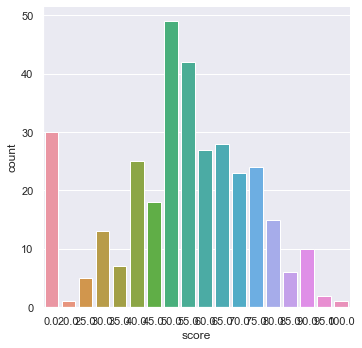

In [719]:
display(pd.DataFrame(pupils.score.describe()))
sns.catplot(x='score', kind='count', data=pupils)
display(pd.DataFrame(pupils.score.value_counts()))

'Медиана:55.0; 25%:45.0; 75%:65.0; IQR:20.0; Границы выбросов:15.0,95.0'

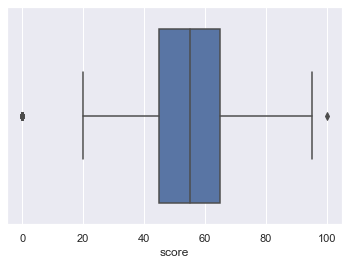

In [720]:
display(box_info(pupils.score))
sns.boxplot(x='score', data=pupils, whis=1.5)

В столбце содержатся данные по госэкзамену по математике. Имеются выбросы в обе стороны. Тем не менее, принято решение не отсекать данные, содержащие предсказываемую величину.

# Ниже DataFrame после исключения номинальных переменных, не влияющий на предсказываемую величину:

In [722]:
pupils.sample(10)

,age,address,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",higher,romantic,famrel,freetime,goout,health,absences,score
210,19,U,3.0,3.0,1.0,4.0,0.0,-12.0,yes,no,4.0,3.0,3.0,3.0,10.0,40.0
115,16,U,4.0,4.0,1.0,2.0,NaN,-6.0,yes,no,5.0,4.0,4.0,5.0,2.0,80.0
26,15,U,2.0,2.0,NaN,1.0,0.0,-3.0,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
34,16,U,3.0,2.0,1.0,1.0,0.0,-3.0,NaN,no,5.0,4.0,3.0,5.0,0.0,75.0
327,17,R,2.0,2.0,4.0,1.0,0.0,-3.0,yes,no,4.0,4.0,5.0,4.0,8.0,50.0
89,16,U,4.0,4.0,1.0,2.0,0.0,-6.0,yes,no,4.0,1.0,NaN,5.0,18.0,35.0
252,18,U,2.0,1.0,1.0,1.0,1.0,-3.0,no,no,3.0,2.0,5.0,5.0,4.0,40.0
128,18,R,2.0,2.0,1.0,1.0,2.0,-3.0,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
143,16,U,1.0,1.0,1.0,1.0,0.0,-3.0,yes,no,3.0,4.0,4.0,1.0,2.0,65.0
61,16,U,1.0,1.0,4.0,1.0,0.0,-3.0,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0


# Ниже корреляционный анализ количественных переменных:

In [598]:
correlation = pupils.corr()

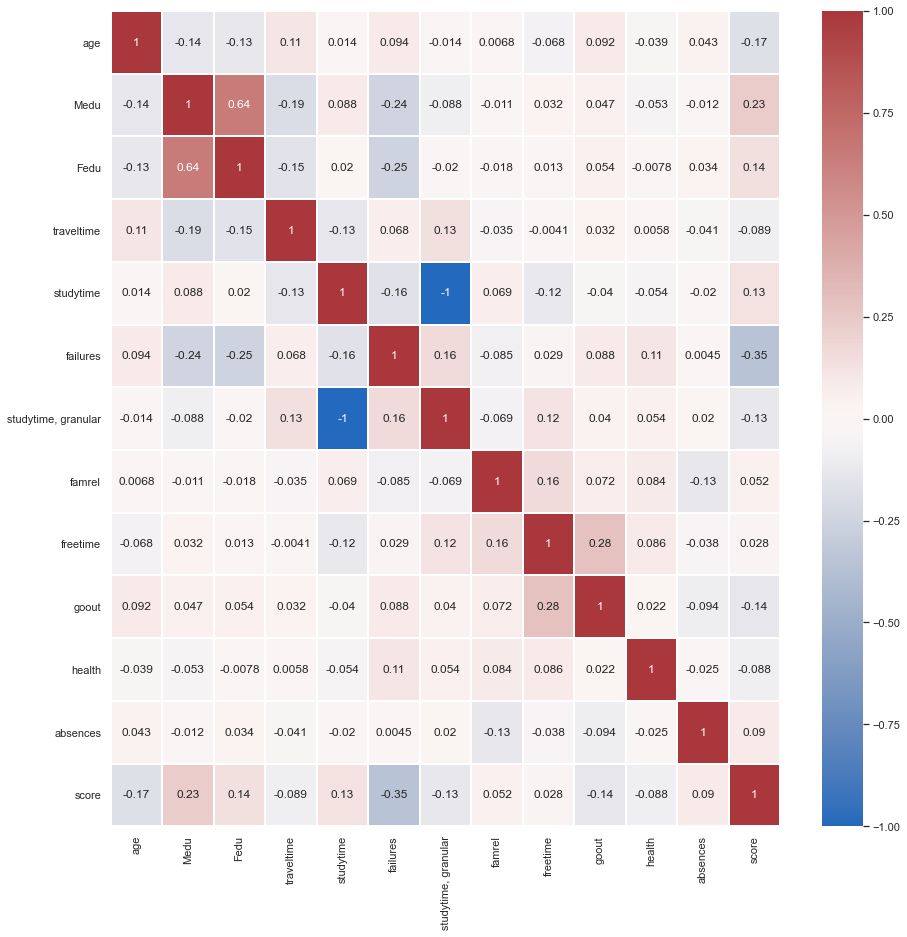

In [599]:
ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, annot=True, cmap='vlag', linewidths=1)

Так как столбцы 'studytime' и 'studytime, granular' имеют корреляцию -1, один из них подлежит удалению.

In [ ]:
del pupils['studytime, granular']

Корреляционный анализ после удфления столбца 'studytime, granular':

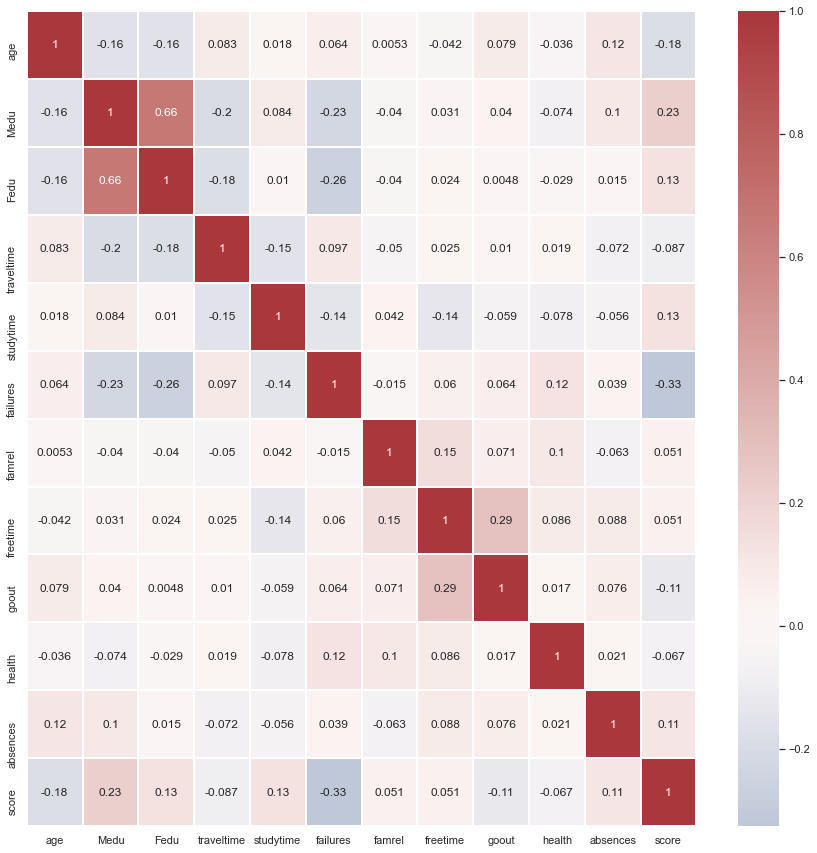

In [730]:
correlation = pupils.corr()
ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, annot=True, cmap='vlag', linewidths=1, center=0)

# Финальная версия DataFrame после обработки:

In [732]:
pupils.sample(10)

,age,address,Medu,Fedu,traveltime,studytime,failures,higher,romantic,famrel,freetime,goout,health,absences,score
45,15,U,4.0,3.0,1.0,2.0,0.0,yes,yes,5.0,2.0,2.0,5.0,8.0,30.0
37,16,R,4.0,4.0,NaN,3.0,0.0,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
187,16,U,2.0,1.0,1.0,2.0,0.0,yes,yes,4.0,2.0,3.0,5.0,0.0,75.0
55,16,U,2.0,1.0,1.0,2.0,0.0,yes,yes,5.0,3.0,4.0,NaN,8.0,50.0
82,15,U,3.0,2.0,1.0,2.0,0.0,yes,no,4.0,4.0,4.0,5.0,10.0,30.0
293,17,R,3.0,1.0,2.0,4.0,0.0,yes,NaN,3.0,1.0,2.0,3.0,6.0,90.0
113,15,U,4.0,2.0,1.0,1.0,0.0,yes,no,3.0,5.0,2.0,3.0,10.0,95.0
176,16,U,2.0,2.0,2.0,2.0,0.0,yes,no,3.0,4.0,4.0,5.0,2.0,55.0
358,18,U,1.0,1.0,2.0,1.0,0.0,yes,yes,3.0,3.0,2.0,3.0,4.0,50.0
225,18,R,3.0,1.0,1.0,2.0,1.0,yes,yes,5.0,3.0,3.0,4.0,16.0,35.0


In [735]:
pupils.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         298 non-null    int64  
 1   address     289 non-null    object 
 2   Medu        298 non-null    float64
 3   Fedu        298 non-null    float64
 4   traveltime  275 non-null    float64
 5   studytime   293 non-null    float64
 6   failures    282 non-null    float64
 7   higher      286 non-null    object 
 8   romantic    273 non-null    object 
 9   famrel      298 non-null    float64
 10  freetime    293 non-null    float64
 11  goout       292 non-null    float64
 12  health      285 non-null    float64
 13  absences    298 non-null    float64
 14  score       298 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 47.2+ KB


# Выводы:

В данных имеется довольно много пропусков по многим парметрам, но не превышающих 10% от выборки.

Имеются как выбросы данных. Среди них выбросы содержащие довольно большую пропорцию учащихся.

Так же в выбросы не всегда попадали данные, не позволяющие судить о распделении признака

Из 17ти категориальных столбцов, только в 3ех случаях (address,	higher, romantic) были найдены статистически значимые различия между вариациями признака.

Из корреляционого анализа можно заключить, что:
    
    Положительное влияние на результат теста имеют:
        -Уровень образования родителей (Fedu, Medu), которые в свою очередь коррелируют между собой
        -Время (studytime), посвященное занятиям.
        -Колличество пропущенных занятий (absences)
    Отрицательное влияние на результат теста имеют:
        -Количество внеучебных неудач (failures)
        -Возраст (age)
        -Проведенное с друзьями время (goout)

Итоговый DataFrame включает параметры, которые предлагается использовать в дальнейшем для построения модели